## <right>Binôme 
* Saliou Barry
* Zhile Zhang
</right>
***

# Visualization

In this notebook, the objective is to manipulate the main visualization tools and interpret the obtained results and graphs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#EDA - Dataset loading and transformation
The file customers.csv contains a list of customers with the total spend by item. The objective of this lab is to do a clustering on the customers and experimenting with dimensional reduction and visualization.

Q1. Load the data and describe elementary statistics.

In [5]:
data = pd.read_csv("customers.csv")
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Q2. Draw the scatter matrix of the pairwise features, the violin plot of each feature and the matrix of correlation (use for all of that seaborn which provides the requested function).


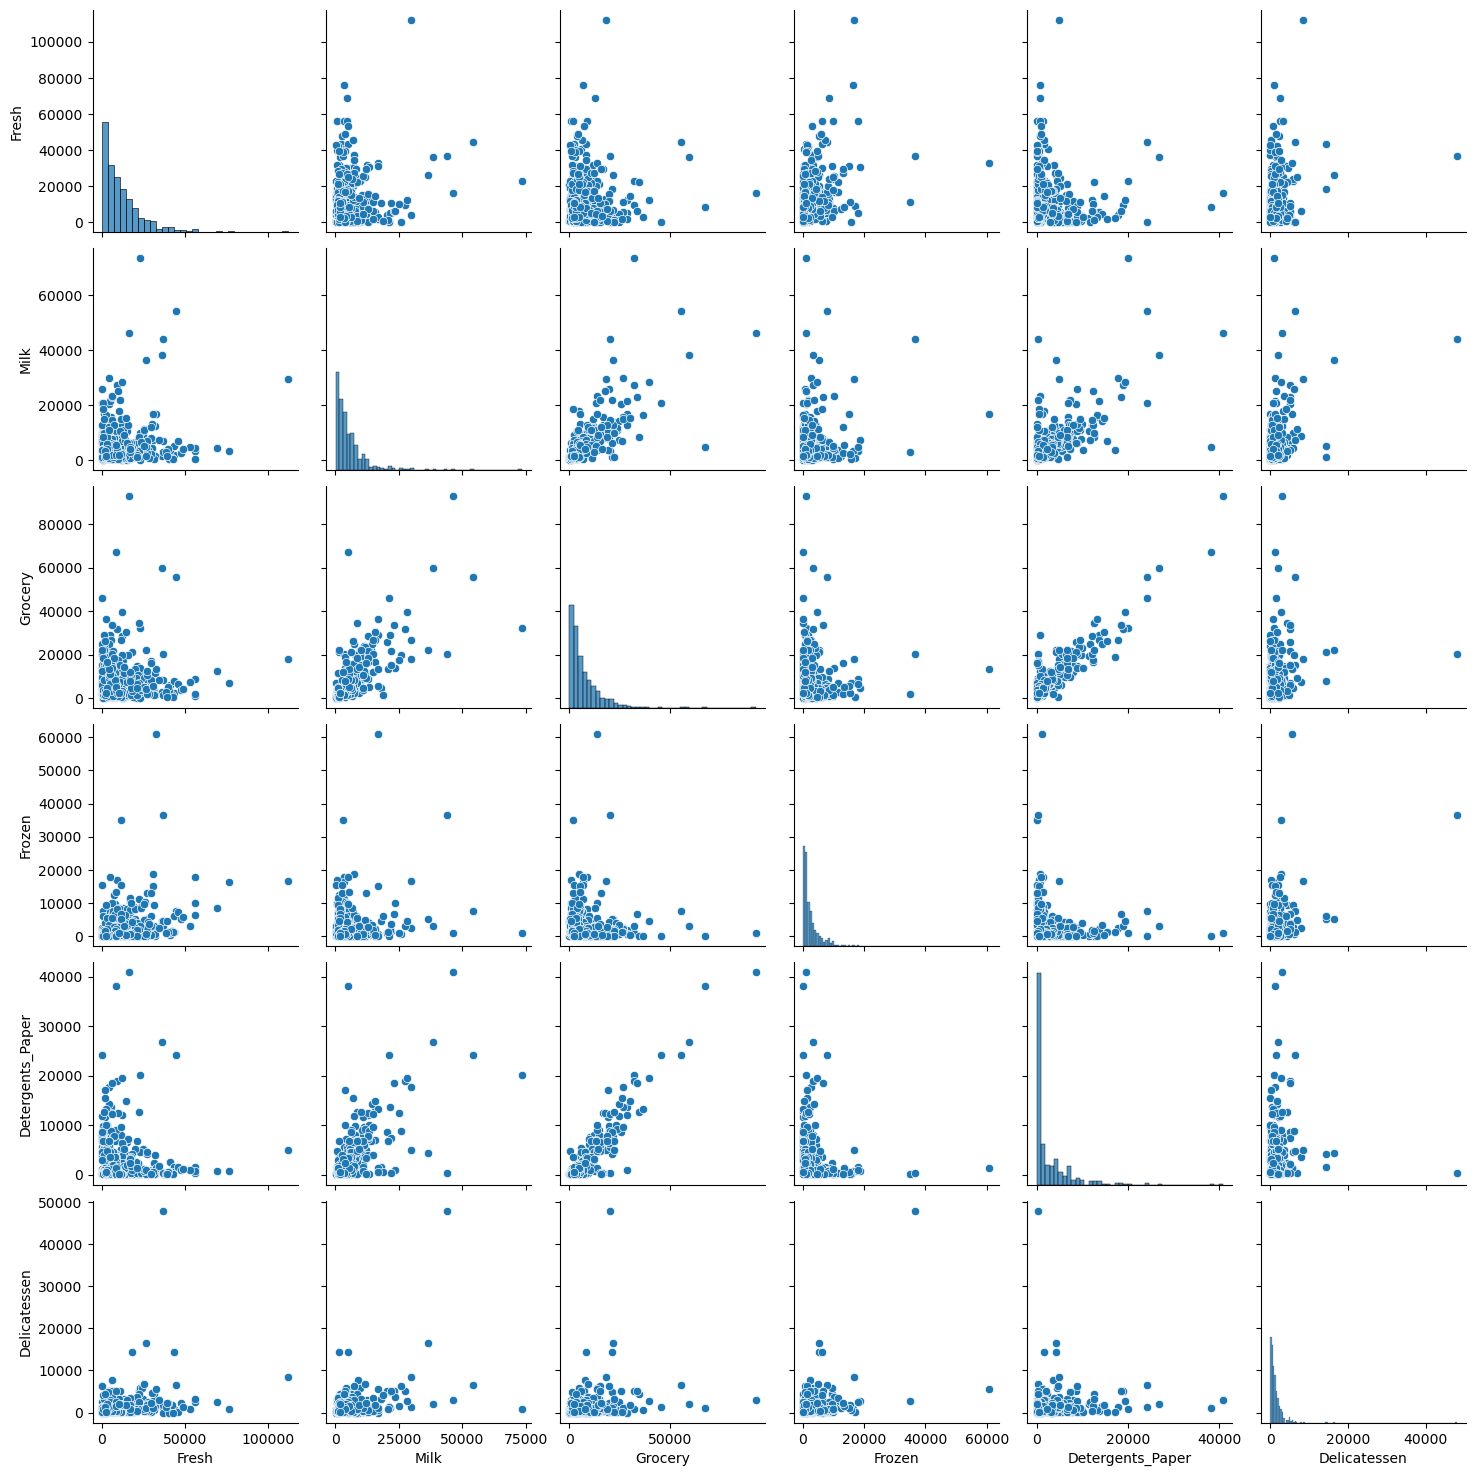

In [6]:
sns.pairplot(data)

<Axes: >

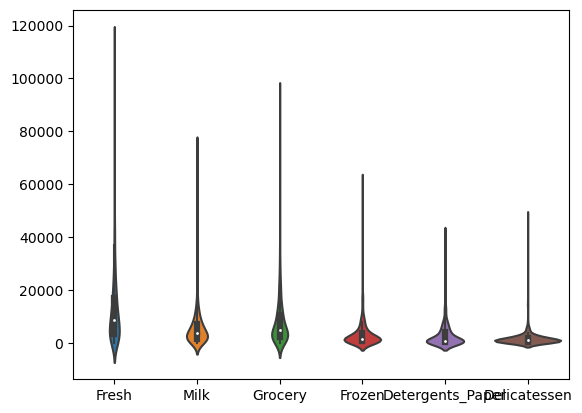

In [7]:
sns.violinplot(data)

<Axes: >

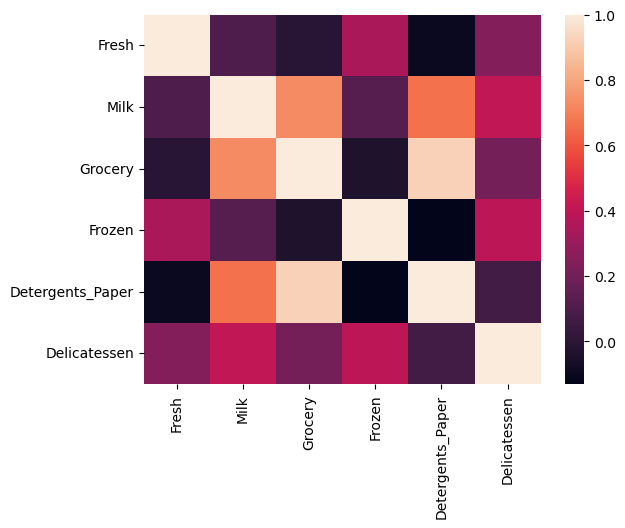

In [8]:
corr = data.corr()
sns.heatmap(corr)

Q3. What can you deduce from those graphs ? What transformation is required ? Apply it and redraw the graphs.

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
def scaleColumn():
    df = scaler.fit_transform(data)
    df = pd.DataFrame(df, columns=data.columns)
    return df

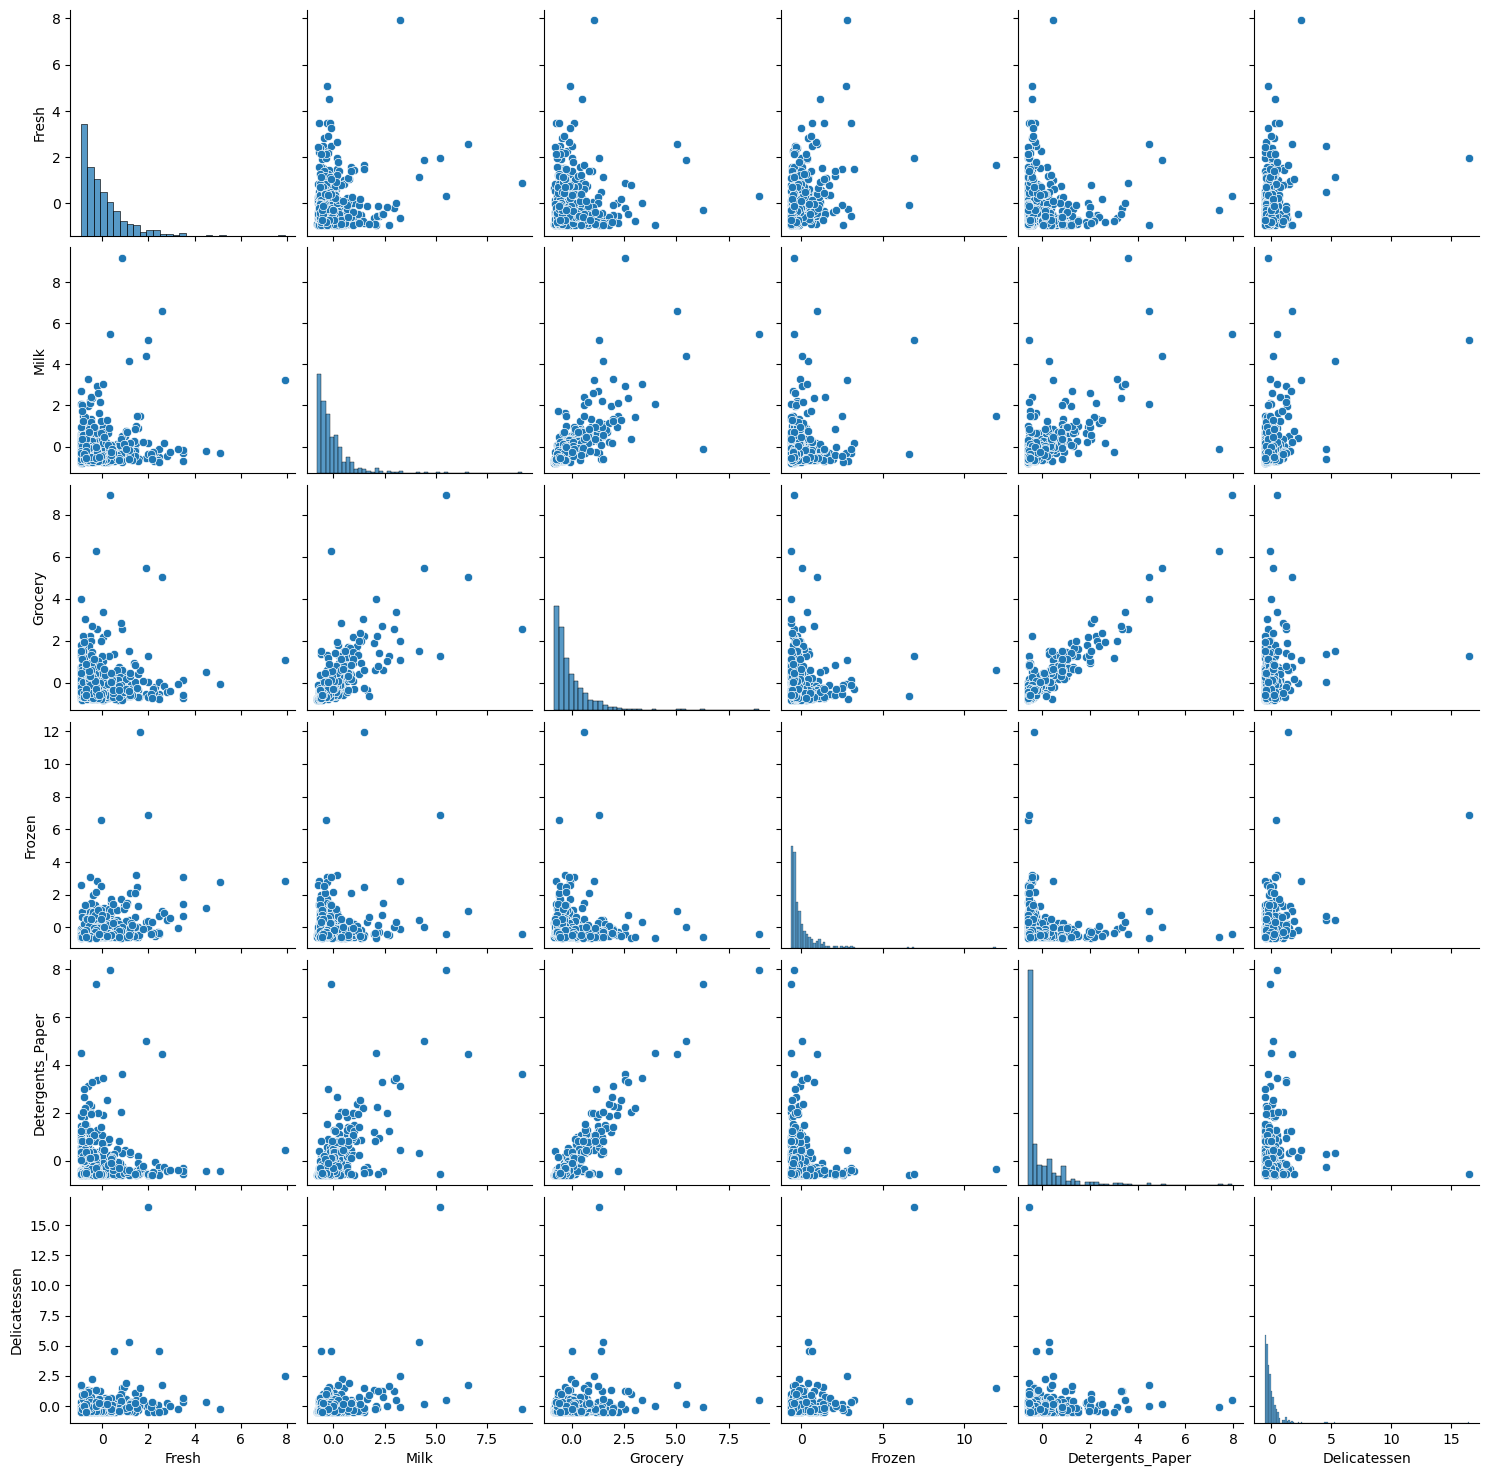

In [82]:
sns.pairplot(scaleColumn())

<Axes: >

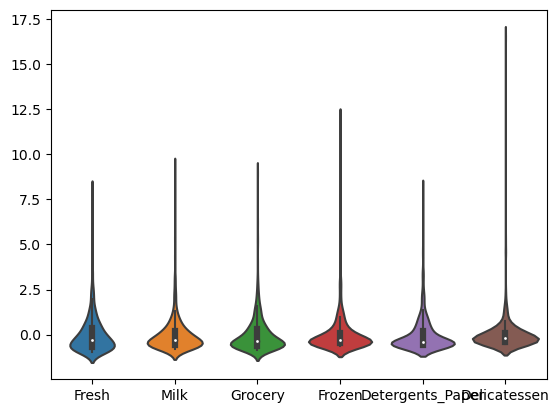

In [68]:
sns.violinplot(scaleColumn())

<Axes: >

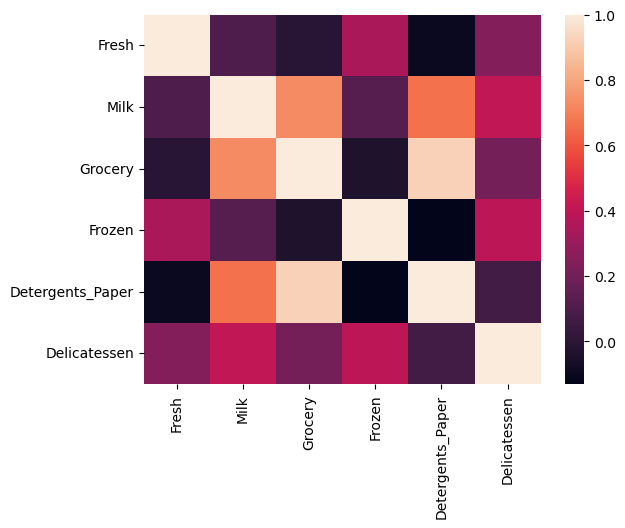

In [83]:
scale_data = scaleColumn()
corr = scale_data.corr()
sns.heatmap(corr)

## PCA
The correlation matrix shows that some features are correlated. It will hinder the clustering process.

Q4. Use a PCA to reduce the dimensionality.

1.   Do the PCA
2.   Display the explained variance for each axis
3. Look at the contribution of each dimension to each new axis
4. Draw the first two axes and the features in a biplot.

What can you conclude from the biplot ?

**How to proceed**
We will use the PCA fonction from scikit-learn  [see here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

First, we create an object which will contain the result of the PCA. In the PCA() function, we can also specify parameters such as the number of components to be retained (n_components - here, we keep all).
Next, we fit the data with the fit() function of the previously created object. In this function, we pass the data to be used (quantitative variables only with no missing data).


The pca object now includes a number of objects and functions. The first object is the table of variances explained (explained_variance_ - proportional to eigenvalues) by each dimension, and the ratio (proportion) of variance explained by dimension (explained_variance_ratio_). Components can also be seen using components_.

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(scale_data)

PCA(n_components=6)

Q5. Make a summary table, with explained variances, simple and cumulative explained variance proportions.

In [85]:
summary_table = pd.DataFrame(columns=['Dimension', 'Explained Variance', 'Explained Variance Ratio', 'Cumulative Explained Variance Ratio'])

# Créer une liste pour stocker les lignes du tableau récapitulatif
rows = []

# Calculer les proportions cumulatives de variance expliquée
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Remplir la liste avec les informations sur chaque dimension
for i in range(len(pca.explained_variance_)):
    rows.append({
        'Dimension': i+1,
        'Explained Variance': pca.explained_variance_[i],
        'Explained Variance Ratio': pca.explained_variance_ratio_[i],
        'Cumulative Explained Variance Ratio': cumulative_variance_ratio[i]
    })

# Créer le DataFrame récapitulatif en concaténant les lignes
summary_table = pd.concat([pd.DataFrame([row]) for row in rows], ignore_index=True)

summary_table

,Dimension,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,1,2.650999,0.440829,0.440829
1,2,1.706462,0.283764,0.724593
2,3,0.741751,0.123344,0.847937
3,4,0.565014,0.093955,0.941892
4,5,0.286327,0.047613,0.989505
5,6,0.063115,0.010495,1.000000


Q6. Plot these proportions of variances explained (in percent).

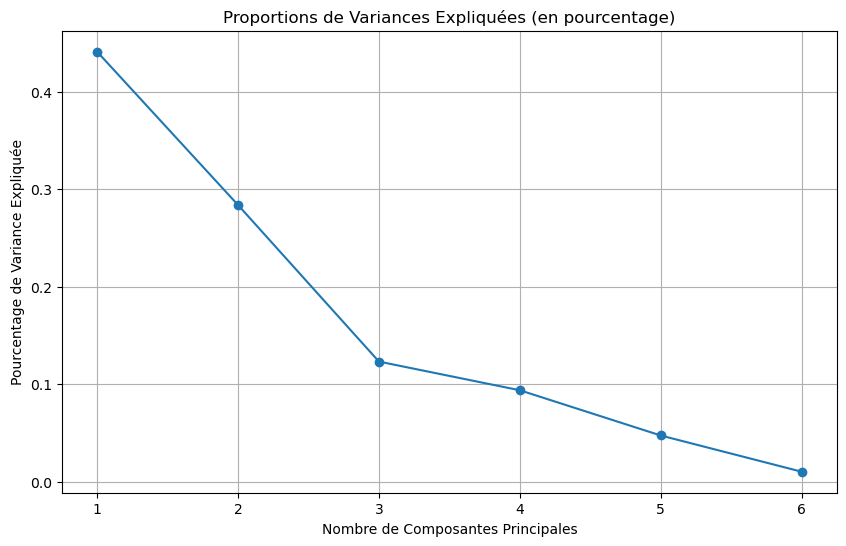

In [86]:
# Calculer les proportions cumulatives de variance expliquée
cumulative_variance_ratio_percent = pca.explained_variance_ratio_ * 100

# Tracer le graphique des proportions de variance expliquée en pourcentage
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Proportions de Variances Expliquées (en pourcentage)')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.xticks(range(1, len(cumulative_variance_ratio_percent) + 1))
plt.grid(True)
plt.show()

Q7. Calculate the coordinates of the individuals on the dimensions, using the transform() function of the pca object. Keep the appropriate number of dimensions and build a table.

In [87]:
pca_data = pca.transform(scale_data)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])


Q8. Plot the data on the first factorial axis.

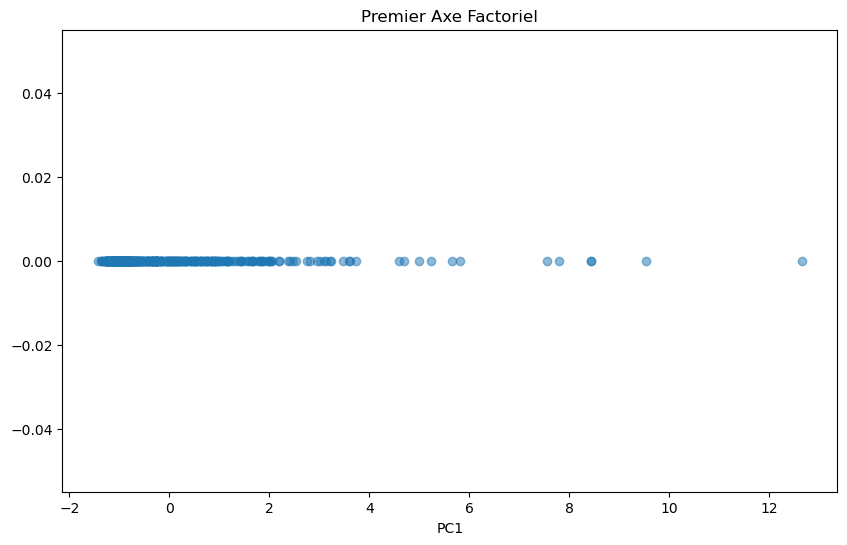

In [88]:
# Q8. Plot the data on the first factorial axis. et aussi le deuxième axe factoriel
plt.figure(figsize=(10, 6))
plt.scatter(pca_data['PC1'], [0] * len(pca_data), alpha=0.5)
plt.title('Premier Axe Factoriel')
plt.xlabel('PC1')
plt.show()



For representing the correlation circle of variables, here is a code.

In [89]:
n = data.shape[0] # nb of individuals
p = data.shape[1] # nb of variables
print(n, '  ', p)
eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p)) # empty matrix for coordinates
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

440    6


,id,COR_1,COR_2
0,Fresh,0.069744,0.688862
1,Milk,0.886546,0.108520
2,Grocery,0.942066,-0.190620
3,Frozen,0.083250,0.797614
4,Detergents_Paper,0.892274,-0.333036
5,Delicatessen,0.404441,0.657905


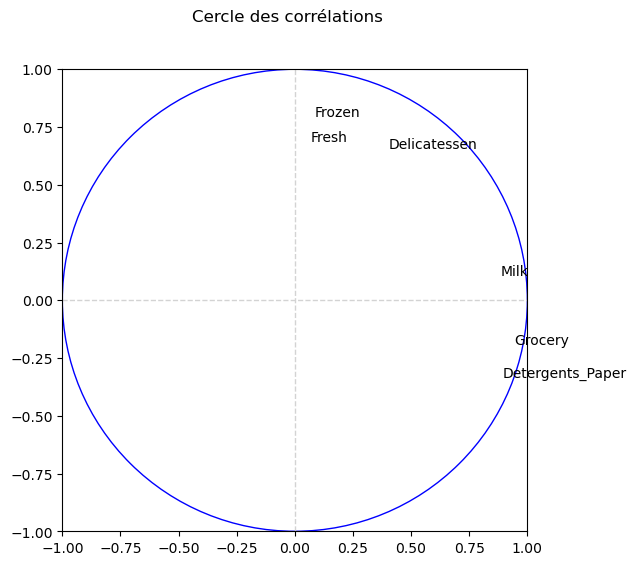

In [76]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

You can also combine variables and individuals as follows:

<BarContainer object of 6 artists>

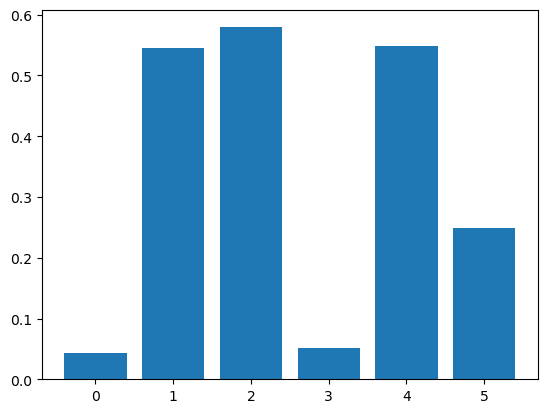

In [90]:
plt.bar(x=range(6),height=pca.components_[0])

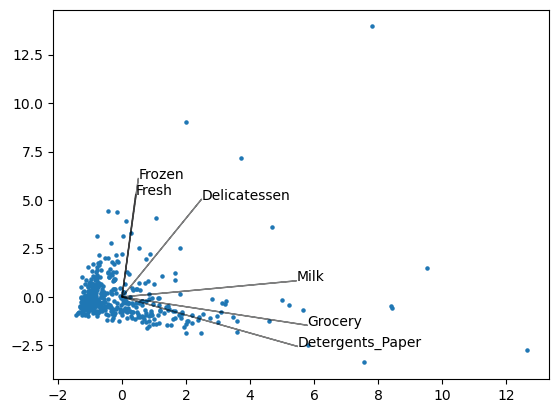

In [95]:

plt.scatter(pca_data.values[:,0],pca_data.values[:,1],s=5)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,pca.components_[0,i]*10,pca.components_[1,i]*10,alpha=0.5)
    plt.text(pca.components_[0,i]*10,pca.components_[1,i]*10,scale_data.columns[i])

Q8. Comment the obtained results

# Other visualizations

Q9. Apply the Isomap, the MDS and the T-SNE algorithm to visualize the transformed data. Feel free to change the parameters of each visualization methods. Draw conclusion from this study.

To obtain readable visualization, we need to first perform a clustering to categorize data. The code is provided below. You can thus specify the color using this command: color = [tab20.colors[pred[i]] for i in range(len(pca_data))]

c:\Users\Saliou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Saliou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


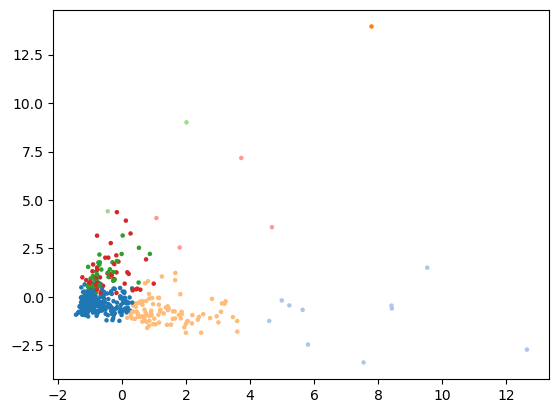

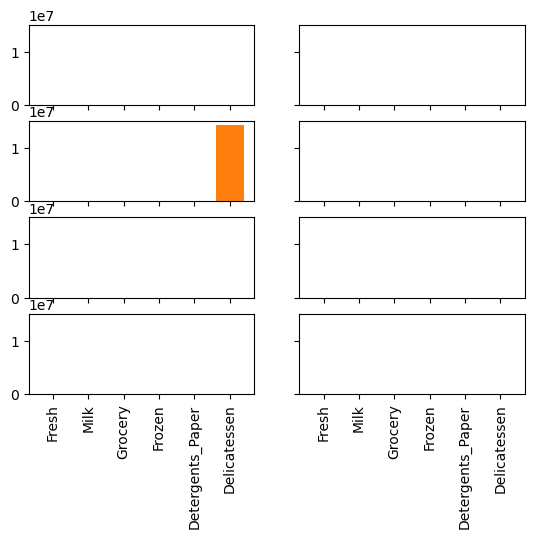

In [99]:
from sklearn.cluster import KMeans
from matplotlib.cm import tab20

km = KMeans(n_clusters=5)
km.n_clusters = 8
pred = km.fit_predict(pca_data)
plt.scatter(pca_data.values[:,0],pca_data.values[:,1],color = [tab20.colors[pred[i]] for i in range(len(pca_data.values))],s=5)
real_centers = np.exp(pca.inverse_transform(km.cluster_centers_))
fig, axs = plt.subplots(km.n_clusters//2, 2, sharey=True,sharex=True)
for i,k in enumerate(real_centers):
    axs.flatten()[i].bar(range(len(k)),k,color=tab20.colors[i])
    axs.flatten()[i].set_xticks(range(len(k)))
    axs.flatten()[i].set_xticklabels(data.columns,rotation="vertical")

tab20 = plt.get_cmap('tab20')



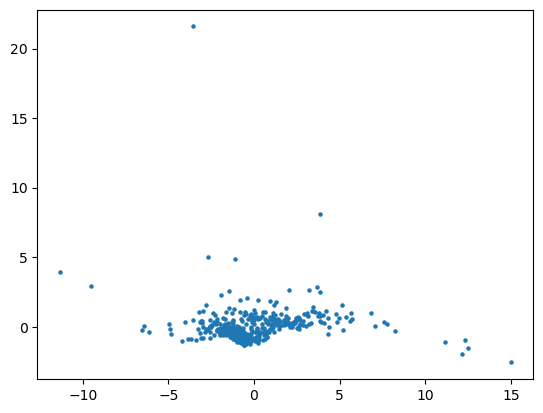

In [100]:
#ISOMAP
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso_data = iso.fit_transform(scale_data)
plt.scatter(iso_data[:,0],iso_data[:,1],s=5)


c:\Users\Saliou\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


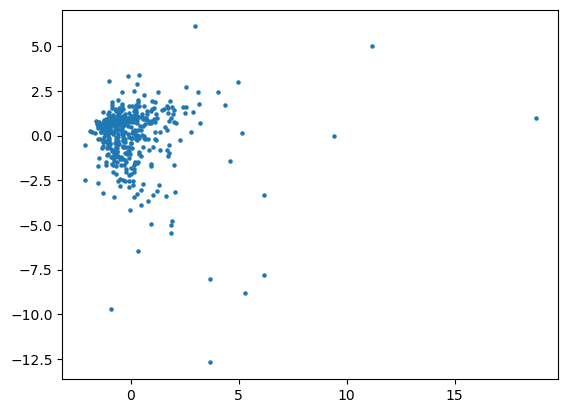

In [101]:
#MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_data = mds.fit_transform(scale_data)
plt.scatter(mds_data[:,0],mds_data[:,1],s=5)



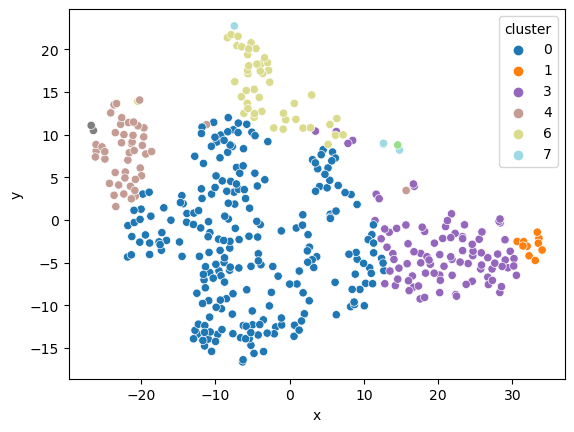

In [103]:
#TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scale_data)
#afficher avec des couleur et des legendes
df = pd.DataFrame(tsne_data,columns=["x","y"])
df["cluster"] = pred
sns.scatterplot(data=df,x="x",y="y",hue="cluster",palette=tab20)
plt.show()

